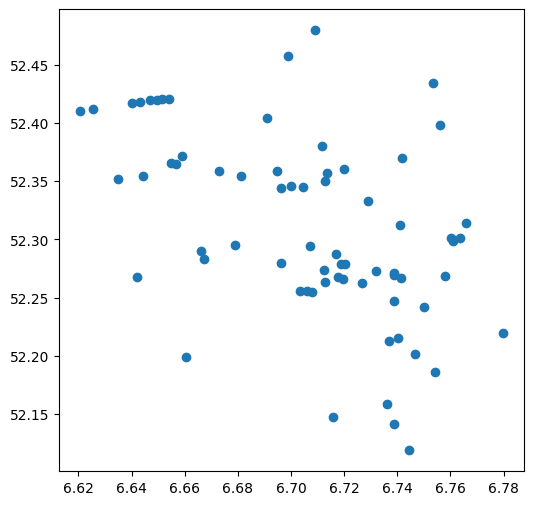

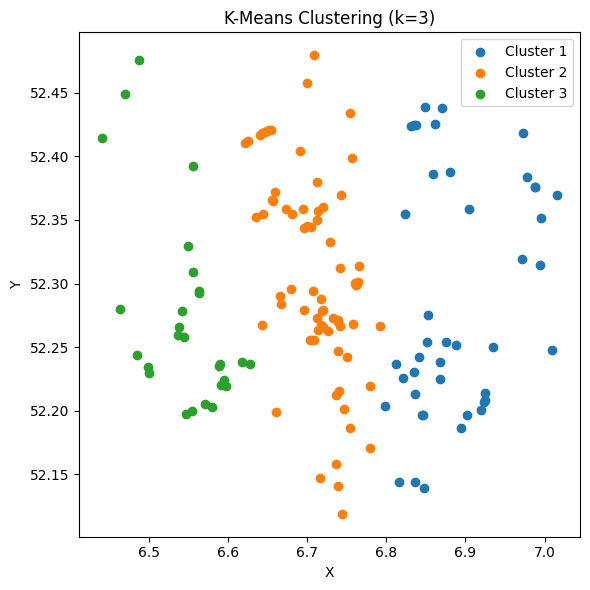

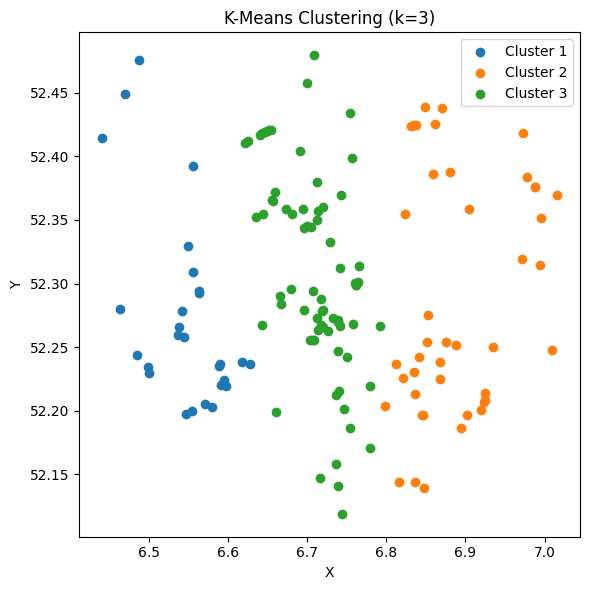

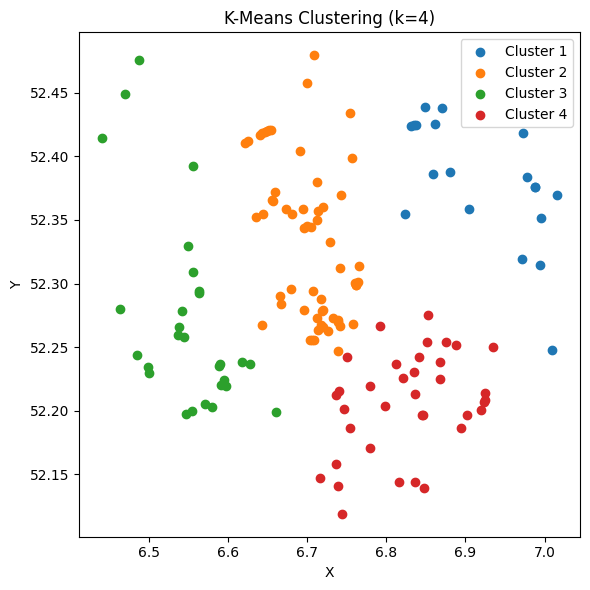

In [34]:
import plotly.express as px  # (version 4.7.0 or higher)
import plotly.graph_objects as go

from dash import Dash, dcc, html, Input, Output  # pip install dash (version 2.0.0 or higher)
import dash_canvas

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
# Start the app
app = Dash(__name__)

In [36]:
farm = pd.read_csv(r'./farm_mock.csv')
farm = farm.drop(['Unnamed: 0'], axis=1)
farm.head()

,x,y,manure_t,biogas_potential_m3
0,6.765843,52.314139,7431,2898090.0
1,6.837249,52.425084,7246,2825940.0
2,6.859361,52.386225,9639,3759210.0
3,6.753483,52.434382,9821,3830190.0
4,6.484077,52.243620,2732,1065480.0


In [37]:
# # -- Import and clean data (importing csv into pandas)
# # df = pd.read_csv("intro_bees.csv")
# df = pd.read_csv(r"./intro_bees.csv")

# df = df.groupby(['State', 'ANSI', 'Affected by', 'Year', 'state_code'])[['Pct of Colonies Impacted']].mean()
# df.reset_index(inplace=True)
# print(df[:5])

In [38]:
# ------------------------------------------------------------------------------
# Dash components
# App layout
app.layout = html.Div([

    # set title of web page 
    html.H1("Web Application Dashboards with Dash - K-means Clustering", style={'text-align': 'center'}),
    dcc.Markdown("Select the number of clusters (k):"),

    dcc.Dropdown(id="k-selector",
                 options=[
                     {'label':str(i), 'value': i} for i in range(2, 7)
                 ],
                #  options=[
                #      {"label": "3", "value": 3}, # connect drop down label to value, which are in interger mode for call back
                #      {"label": "4", "value": 4},
                #      {"label": "5", "value": 5},
                #      {"label": "6", "value": 6}],
                 multi=False,
                 value=3, # Default value
                 style={'width': "40%"}
                 ),

    # html.Div(id='output_container', children=[]),
    # html.Br(), # break line

    # graph 
    dcc.Graph(id='cluster-plot'),
    dash_canvas.DashCanvas(
        id='canvas',
        width=400,
        height=400
    )
])

In [39]:
# ------------------------------------------------------------------------------
# Connect the Plotly graphs with Dash Components
# @app.callback(
#     [Output(component_id='output_container', component_property='children'), # output of map and output container
#      Output(component_id='my_bee_map', component_property='figure')],
#     [Input(component_id='slct_year', component_property='value')] # every input needs a def function for arg
# )

@app.callback(
    [Output('cluster-plot', 'figure'), Output('canvas', 'json_data')],
    Input('k-selector', 'value')
)

def update_graph(k): # 'value' in input goes as input to this def function
    # print(option_slctd)
    # print(type(option_slctd))

    # container = "The year chosen by user was: {}".format(option_slctd)

    dff = farm.copy()

    model = KMeans(n_clusters=k)
    dff['cluster'] = model.fit_predict(dff[['x', 'y']])

    # Create a Matplotlib scatter plot
    plt.figure(figsize=(6, 6))
    for cluster_label in range(k):
        cluster_data = dff[dff['cluster'] == cluster_label]
        plt.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster_label + 1}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'K-Means Clustering (k={k})')
    plt.legend()
    plt.tight_layout()

    # Convert Matplotlib plot to JSON data
    img_data = dash_canvas.utils.array_to_data_url(np.array(plt.gcf().canvas.renderer.buffer_rgba()))

    return px.scatter(dff, x='x', y='y', color='cluster', title=f'K-Means Clustering (k={k})'), img_data


In [41]:
# app.run_server(mode='inline')

In [42]:
app.run(jupyter_mode="tab")

Dash app running on http://127.0.0.1:8050/


<IPython.core.display.Javascript object>

In [43]:
app.run_server(mode='external')

In [ ]:
# ------------------------------------------------------------------------------
if __name__ == '__main__':
    app.run()

/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

[2023-09-27 11:49:28,849] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/flask/app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/flask/app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/flask/app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/flask/app.py", line 1799, in dispatch_request
    retu